# Display Examples

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.python.client import device_lib
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
import numpy as np
import os
from keras.models import load_model

/home/sgf2/.conda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
from copy import copy
def deprocess_inception(y):
    x = copy(y).astype(np.float)
    x += 1.
    x /= 2.
    #x *= 255.
    return x

def preprocess_inception(y):
    x = copy(y).astype(np.float)
    x /= 255.
    x *= 2.
    x -= 1.
    return x

def calc_pert(img_num, x_true, x_adv):
    return deprocess_inception(x_adv[img_num] - x_true[img_num])

import matplotlib.pyplot as plt
def display_adv_examples(imgNum, X_test_adv,
                         model, X_test, y_test,
                         verbose = False, X_test_bb = None):
    if verbose:
        print('Truth: ' + str(y_test[imgNum:imgNum+1]) )
        print('Model predict on true image: ' + str(model.predict(X_test[imgNum:imgNum+1])))
        print('Model predict on adversarial image: ' + str(model.predict(X_test_adv[imgNum:imgNum+1])))
        if X_test_bb is not None:
            print('Model predict on BB adversarial image: ' + str(model.predict(X_test_bb[imgNum:imgNum+1])))
        print("")

    plt.figure()
    print("True Image Deprocessed:")
    img = plt.imshow(deprocess_inception(X_test[imgNum]))
    img.set_cmap('hot')
    plt.axis('off')
    plt.show()

    print("Adversarial Image Deprocessed:")
    plt.figure()
    img = plt.imshow(deprocess_inception(X_test_adv[imgNum]))
    img.set_cmap('hot')
    plt.axis('off')
    plt.show()

    print("Perturbation:")
    plt.figure()
    img = plt.imshow(deprocess_inception((X_test_adv[imgNum] - X_test[imgNum])*20))
    img.set_cmap('hot')
    plt.axis('off')
    plt.show()
    
    
def generate_roc(preds, y_test, model):
    N = preds.shape[0]
    true_labels = y_test[0:N,1]
    pred_labels = preds[0:N,1]
    
    fpr, tpr, thresholds = metrics.roc_curve(true_labels, pred_labels)
    auc_score = auc(fpr,tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % float(auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [5]:
def getResults(directory, save = False):
    os.chdir(directory)

    X_test = np.load('data/val_test_x_preprocess.npy', mmap_mode = "r")
    y_test = np.load('data/val_test_y.npy')

    X_test_pgd = np.load('data/pgd_eps02_WhiteBox.npy', mmap_mode = "r")
    X_test_pgd_bb = np.load('data/pgd_eps02_BlackBox.npy', mmap_mode = "r")
    
    if save:
        preds_clean = model.predict(X_test)
        np.save('data/winning_model_preds.npy', preds_clean)

    #preds_pgd = model.predict(X_test_pgd)
    #perts_pgd = X_test_pgd - X_test
    
    #preds_pgd_bb = model.predict(X_test_pgd_bb)
    #perts_pgd_bb = X_test_pgd_bb - X_test

    #print("Accuracy Clean: ", np.mean((preds_clean[:,1] > 0.5) == y_test[:,1]))
    #print("Accuracy WB: ", np.mean((preds_pgd[:,1] > 0.5) == y_test[:,1]))
    #print("Accuracy BB: ", np.mean((preds_pgd_bb[:,1] > 0.5) == y_test[:,1]))
    
    return (#preds_clean, preds_pgd, preds_pgd_bb,
            X_test, y_test,
            X_test_pgd, X_test_pgd_bb
           )

Truth: [[1. 0.]]
Model predict on true image: [[0.95175016 0.04824986]]
Model predict on adversarial image: [[1.2422442e-10 1.0000000e+00]]
Model predict on BB adversarial image: [[7.375011e-05 9.999262e-01]]

True Image Deprocessed:


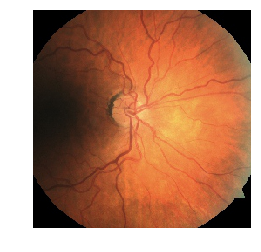

Adversarial Image Deprocessed:


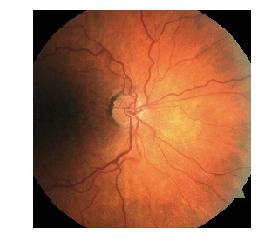

Perturbation:


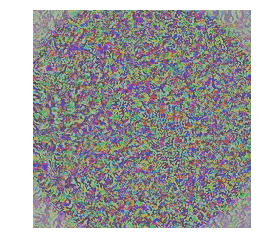

Truth: [[0. 1.]]
Model predict on true image: [[0.01415537 0.9858446 ]]
Model predict on adversarial image: [[1.0000000e+00 2.0053404e-08]]
Model predict on BB adversarial image: [[9.9909365e-01 9.0640335e-04]]

True Image Deprocessed:


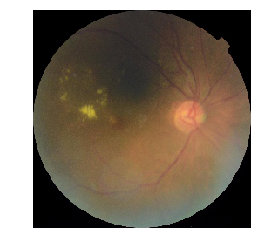

Adversarial Image Deprocessed:


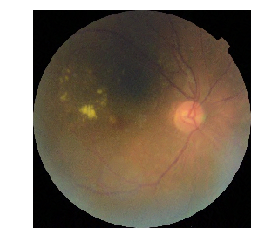

Perturbation:


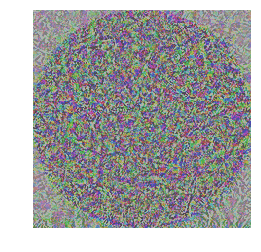

In [18]:
print("Retinopathy")
model = load_model('/home/sgf2/DBMI_server/adversarial_attacks/retinopathy/models/wb_model.h5')

(#dr_preds_clean, dr_preds_pgd, preds_pgd_bb,
 X_test, dr_y_test,
 X_test_pgd_wb, X_test_pgd_bb) = getResults('/home/sgf2/DBMI_server/adversarial_attacks/retinopathy')

display_adv_examples(15, X_test_pgd_wb, model, X_test, dr_y_test, verbose = True, X_test_bb = X_test_pgd_bb)
display_adv_examples(10640, X_test_pgd_wb, model, X_test, dr_y_test, verbose = True, X_test_bb = X_test_pgd_bb)

Chest X-Ray
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Truth: [[1. 0.]]
Model predict on true image: [[0.9975188  0.00248129]]
Model predict on adversarial image: [[2.3234385e-11 1.0000000e+00]]
Model predict on BB adversarial image: [[0.0220151 0.9779849]]

True Image Deprocessed:


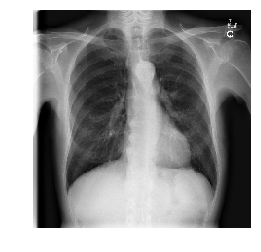

Adversarial Image Deprocessed:


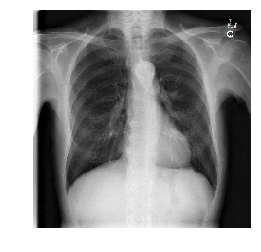

Perturbation:


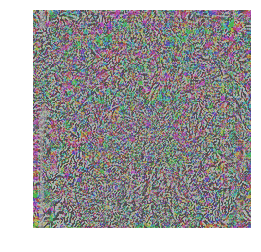

Truth: [[0. 1.]]
Model predict on true image: [[0.2069369  0.79306316]]
Model predict on adversarial image: [[1.0000000e+00 1.0546143e-11]]
Model predict on BB adversarial image: [[0.9799585  0.02004154]]

True Image Deprocessed:


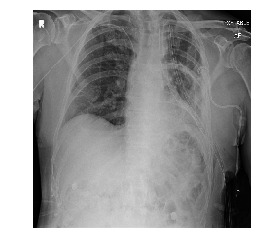

Adversarial Image Deprocessed:


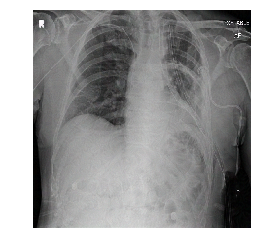

Perturbation:


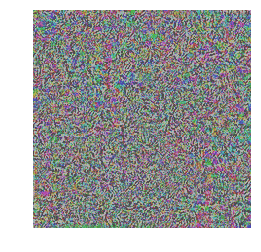

In [6]:
print("Chest X-Ray")
model = load_model('/home/sgf2/DBMI_server/adversarial_attacks/cxr/models/wb_model.h5')
(#dr_preds_clean, dr_preds_pgd, preds_pgd_bb,
 X_test, cxr_y_test,
 X_test_pgd_wb, X_test_pgd_bb) = getResults('/home/sgf2/DBMI_server/adversarial_attacks/cxr')

display_adv_examples(2, X_test_pgd_wb, model, X_test, cxr_y_test, verbose = True, X_test_bb = X_test_pgd_bb)
display_adv_examples(8378, X_test_pgd_wb, model, X_test, cxr_y_test, verbose = True, X_test_bb = X_test_pgd_bb)
#8375

Truth: [[1. 0.]]
Model predict on true image: [[0.9906974  0.00930259]]
Model predict on adversarial image: [[2.2059932e-11 1.0000000e+00]]
Model predict on BB adversarial image: [[0.1251745 0.8748255]]

True Image Deprocessed:


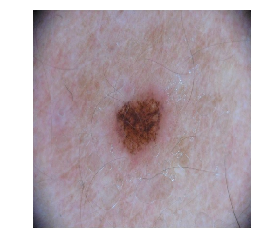

Adversarial Image Deprocessed:


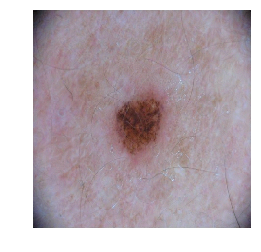

Perturbation:


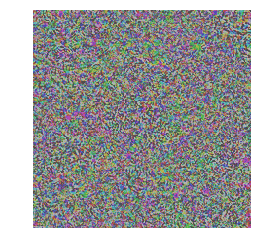

Truth: [[0. 1.]]
Model predict on true image: [[0.22231914 0.7776809 ]]
Model predict on adversarial image: [[1.0000000e+00 3.1012285e-14]]
Model predict on BB adversarial image: [[9.9966812e-01 3.3190963e-04]]

True Image Deprocessed:


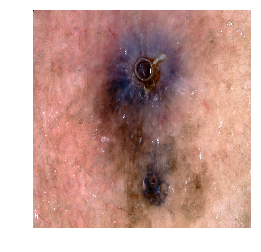

Adversarial Image Deprocessed:


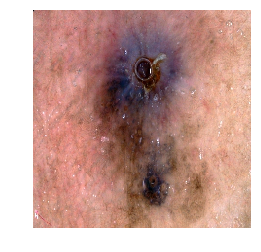

Perturbation:


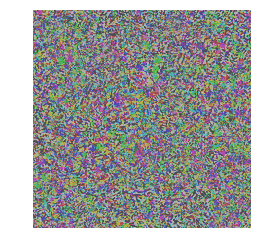

In [146]:
print("Melanoma")
model = load_model('/home/sgf2/DBMI_server/adversarial_attacks/melanoma/models/wb_model.h5')

(#dr_preds_clean, dr_preds_pgd, preds_pgd_bb,
 X_test, derm_y_test,
 X_test_pgd_wb, X_test_pgd_bb) = getResults('/home/sgf2/DBMI_server/adversarial_attacks/melanoma')

display_adv_examples(1, X_test_pgd_wb, model, X_test, derm_y_test, verbose = True, X_test_bb = X_test_pgd_bb)
display_adv_examples(531, X_test_pgd_wb, model, X_test, derm_y_test, verbose = True, X_test_bb = X_test_pgd_bb)

# Toy Model Confidence Plots

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confidence_plot(preds = [0.93706179, 0.06293821],
                  labels = ["Pneumothorax", "Normal"],
                   isNormal = True, hideText = False,
                   diseaseTop = False):
    sns.set(font_scale=2)

    if isNormal:
        pal = ["red", "green"]
    else:
        pal = ["green", "red"]
        
    if not diseaseTop:
        preds.reverse()
        pal.reverse()
        labels.reverse()
        
    d = {'Model Confidence' : pd.Series(preds, index=['a', 'b']),
         'Diagnosis' : pd.Series(labels, index=['a', 'b'])}
    ax = sns.barplot(x="Model Confidence", y="Diagnosis",
                     data=pd.DataFrame(d), palette=pal)
    ax.set_xlim((0,1))
    ax.set_ylabel('') 
    if hideText:
        ax.set_yticklabels(['',''])
        ax.set_xlabel('')
        ax.set_xticklabels('')
    plt.show()

### Generate plots

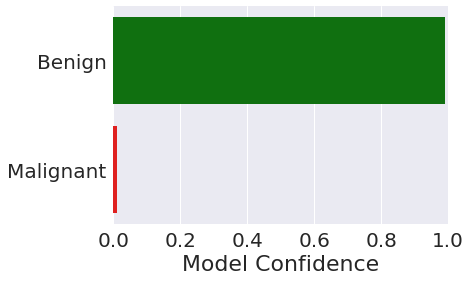

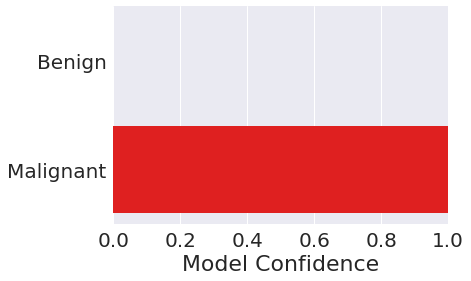

In [25]:
hide_diag = False
confidence_plot([ 0.00930259, 0.9906974],
               ["Malignant", "Benign"],
               isNormal = True, hideText = hide_diag)

confidence_plot([1.0000000e+00, 2.2059932e-11],
               ["Malignant", "Benign"],
               isNormal = True, hideText = hide_diag)

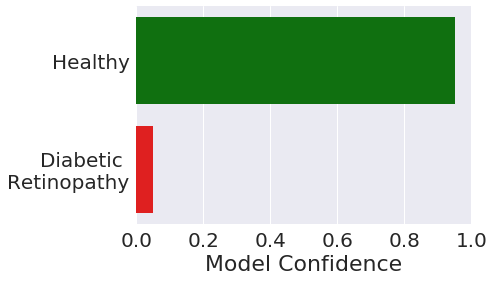

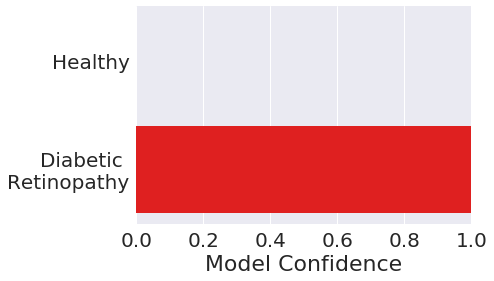

In [2]:
hide_diag = False
confidence_plot([ 0.048, 1 - 0.048],
               ["Diabetic \nRetinopathy", "Healthy"],
               isNormal = True, hideText = hide_diag)

confidence_plot([1.0000000e+00, 2.2059932e-11],
               ["Diabetic \nRetinopathy", "Healthy"],
               isNormal = True, hideText = hide_diag)

# ROC, Sensitivity, Specificity

## Load Model Output

In [7]:
import numpy as np
import os
os.chdir('/home/sgf2/DBMI_server/adversarial_attacks/')

y_test_dr = np.load('retinopathy/data/val_test_y.npy')
preds_dr = np.load('retinopathy/data/winning_model_preds.npy') #from model 30 epochs is best right now
print((preds_dr.shape, y_test_dr.shape))

y_test_cxr = np.load('cxr/data/val_test_y.npy')
preds_cxr = np.load('cxr/data/winning_model_preds.npy')
print((y_test_cxr.shape, preds_cxr.shape))

y_test_derm = np.load('melanoma/data/val_test_y.npy')
preds_derm = np.load('melanoma/data/winning_model_preds.npy')
print((preds_derm.shape, y_test_derm.shape))

((10644, 2), (10644, 2))
((8383, 2), (8383, 2))
((533, 2), (533, 2))


## Plot Roc

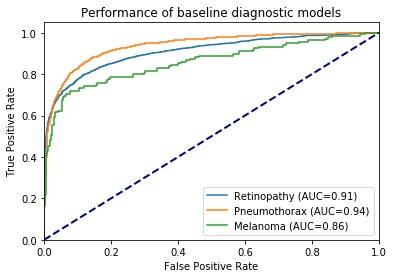

In [8]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(0).clf()
lw = 2

fpr, tpr, thresh = metrics.roc_curve(y_test_dr[:,1], preds_dr[:,1])
auc = metrics.roc_auc_score(y_test_dr[:,1], preds_dr[:,1])
plt.plot(fpr,tpr,label='Retinopathy (AUC=%0.2f)' % float(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test_cxr[:,1], preds_cxr[:,1])
auc = metrics.roc_auc_score(y_test_cxr[:,1], preds_cxr[:,1])
plt.plot(fpr,tpr,label='Pneumothorax (AUC=%0.2f)' % float(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test_derm[:,1], preds_derm[:,1])
auc = metrics.roc_auc_score(y_test_derm[:,1], preds_derm[:,1])
plt.plot(fpr,tpr,label='Melanoma (AUC=%0.2f)' % float(auc))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title("Performance of baseline diagnostic models")
#plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### DR

In [22]:
# Recall of positive is sensitivity, recall of negative is spec
from sklearn.metrics import classification_report
print("DR performance. Thresh 0.069")
print(classification_report(y_test_dr[:,1], (preds_dr[:,1] > 0.14) ))

DR performance. Thresh 0.069
             precision    recall  f1-score   support

        0.0       0.96      0.80      0.87      8715
        1.0       0.48      0.85      0.62      1929

avg / total       0.87      0.81      0.82     10644

DR performance. Thresh 0.0434
             precision    recall  f1-score   support

        0.0       0.97      0.69      0.81      8715
        1.0       0.39      0.90      0.55      1929

avg / total       0.86      0.73      0.76     10644



### CXR

In [38]:
print("\nCXR performance. Thresh 0.015")
print(classification_report(y_test_cxr[:,1], (preds_cxr[:,1] > 0.025)))


CXR performance. Thresh 0.015
             precision    recall  f1-score   support

        0.0       0.99      0.82      0.90      7684
        1.0       0.31      0.90      0.47       699

avg / total       0.93      0.83      0.86      8383



### Derm

In [41]:
print("\nDerm performance. Thresh")
print(classification_report(y_test_derm[:,1],  (preds_derm[:,1] > 0.02)))


Derm performance. Thresh
             precision    recall  f1-score   support

        0.0       0.91      0.73      0.81       398
        1.0       0.50      0.80      0.61       135

avg / total       0.81      0.74      0.76       533

